# 1D négyszög potenciál véges differencia sémával

Oldjuk meg numerikusan az 1D Schrödinger egyenlet sajátérték-problémáját ismert $V(x)$
potenciál esetén:
$$
\begin{equation*}
    \hat H \psi = E\psi \\
    \left[\frac{-\hbar^2}{2m}\partial_x^2 + V(x)\right]\psi(x) = E\psi(x)
\end{equation*}
$$

$$
\begin{equation*}
    V(x) = \begin{cases}
             -V_0, &\quad\text{ha} \, x \in [-\frac{a}{2}, \frac{a}{2}] \\
                0, &\quad\text{különben}
           \end{cases}
\end{equation*}
$$

Tegyük fel, hogy $x\in [-\frac{A}{2}, \frac{A}{2}]$, úgy, hogy $a<A$. Továbbá ki kell kötni, hogy $\psi(-A/2)=\psi(A/2)=0$.
A problémát numerikusan véges differencia módszerrel oldjuk meg, ehhez diszkretizálni kell a Schrödinger-egyenletet. Osszuk fel a $[-\frac{A}{2}, \frac{A}{2}]$ tartományt $N$ részre,
úgy, hogy
$$x_0 = - \frac{A}{2}\\
x_N = \frac{A}{2}\\
x_j = x_0 + jb = x_0 + j\frac{A}{N}\\
\psi_j = \psi(x_j)\\
V_j = V(x_j)
$$
A véges differencia módszer lényege, hogy a deriváltakat véges különbségekkel közelítjük, ehhez az alábbi összefüggéseket használjuk fel:
$$
\begin{equation*}
f'(x) = \frac{f(x+b)-f(x)}{b}\\
f''(x) = \frac{\frac{f(x+b)-f(x)}{b} - \frac{f(x)-f(x-b)}{b}}{b} =
\frac{f(x+b) - 2f(x) + f(x-b)}{b^2}
\end{equation*}
$$

Ezt behelyettesítve a Schrödinger-egyenletet így írhatjuk:

$$
\begin{equation*}
\frac{-\hbar^2}{2m} \frac{\psi(x+b)-2\psi(x) + \psi(x-b)}{b^2} + V(x)\psi(x) = E\psi(x)
\end{equation*}
$$

Ennek az egyenletnek minden $x_j$ pontban teljesülnie kell, ezért felírhatjuk az alábbi 
lineáris egyenletrendszert:
$$
\LARGE{\vdots}\\
\begin{array}{cccccccccccc}
... & + & \left(V_{j-1}-2\frac{-\hbar^2}{2mb^2}\right)\psi_{j-1} & + & \left(\frac{-\hbar^2}{2mb^2}\right)\psi_j & + & 0 & + & ... & = & E\psi_{j-1} \\
... & + & \left(\frac{-\hbar^2}{2mb^2}\right)\psi_{j-1} & + & \left(V_{j}-2\frac{-\hbar^2}{2mb^2}\right)\psi_{j} & + & \left(\frac{-\hbar^2}{2mb^2}\right)\psi_{j+1} &+ & ... & = & E\psi_{j} \\
... & + & 0 & + & \left(\frac{-\hbar^2}{2mb^2}\right)\psi_{j} & + & \left(V_{j+1}-2\frac{-\hbar^2}{2mb^2}\right)\psi_{j+1} & + & ... & = & E\psi_{j+1}
\end{array}\\
\LARGE{\vdots}
$$

Ez alapján felírhatjuk a diszkretizált Hamilton-operátorát a rendszernek:

$$
\hat H = 
\frac{-\hbar^2}{2mb^2}
\begin{bmatrix}
\ddots &    &    &    &    \\
       & -2 & 1  &  0 &    \\
       &  1 & -2 &  1 &    \\ 
       &  0 & 1  & -2 &    \\
       &    &    &    & \ddots
\end{bmatrix}
+
\begin{bmatrix}
\ddots &       &    &        &    \\
       &V_{j-1}& 0   & 0     &    \\
       &  0    &V_{j}& 0     &    \\ 
       &  0    & 0   &V_{j+1}&    \\
       &       &     &       & \ddots
\end{bmatrix}
$$

$$
\begin{equation*}
\hat H \begin{bmatrix}
\vdots\\
\psi_{j-1}\\
\psi_j\\
\psi_{j+1}\\
\vdots\\
\end{bmatrix}
= E \begin{bmatrix}
\vdots\\
\psi_{j-1}\\
\psi_j\\
\psi_{j+1}\\
\vdots\\
\end{bmatrix}
\end{equation*}
$$

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.linalg import eigh, eigvalsh_tridiagonal

hbar = 1.0
m = 1.0

Xmax = 10.0 # Maximum of X range
nstep = 2560 # number of steps
x = np.linspace(0, Xmax, nstep)
b = x[1]-x[0]

Mdd = 1./(b*b)*(np.diag(np.ones(nstep-1),-1) - 2*np.diag(np.ones(nstep),0) + np.diag(np.ones(nstep-1),+1))

# Szabad elektron

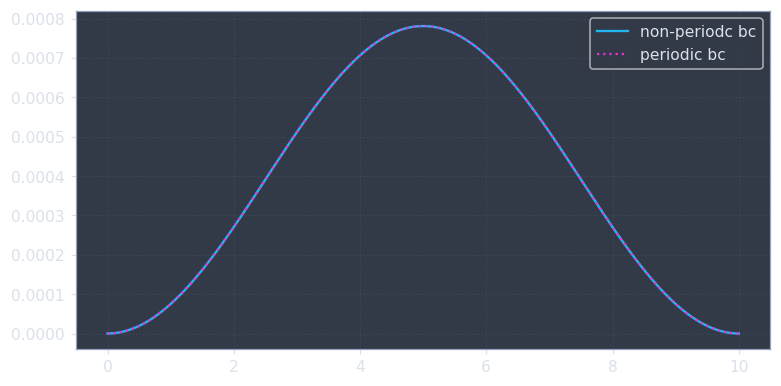

In [7]:
H0 = -hbar**2/(2.0*m)*Mdd

w, v = eigh(H0)
psi = np.transpose(v)[0]
plt.figure(figsize=(8,4), dpi=112)
plt.plot(x, psi**2, label="non-periodc bc")

Hp = np.copy(H0)
Hp[Hp.shape[0]-1, 0]=1
Hp[0, Hp.shape[1]-1]=1

wp, vp = eigh(Hp)
psip = np.transpose(vp)[0]
plt.plot(x, psip**2, ':', label="periodic bc")
plt.legend()

In [3]:
from scipy.integrate import solve_bvp

def fun(x, y, p):
    E = p[0]
    return np.vstack((y[1], -(2*m*E)/hbar**2*y[0]))

def bc(ya, yb, p):
    return np.array([ya[0], yb[0], ya[1] - 0.001])
  
yi = np.zeros((2, x.size))
yi[0, 10:20] = 0.2

sol = solve_bvp(
    fun,
    bc=bc,
    x=x,
    y=yi,
    p = [0.5]
)

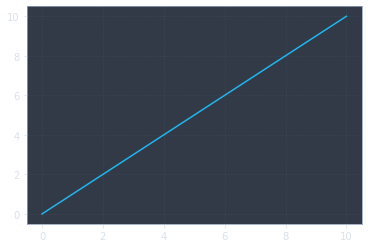

In [4]:
plt.plot(x, sol.x)

In [5]:
import scipy
help(scipy.integrate._bvp.BVPResult)

Help on class BVPResult in module scipy.integrate._bvp:

class BVPResult(scipy.optimize.optimize.OptimizeResult)
 |  Represents the optimization result.
 |  
 |  Attributes
 |  ----------
 |  x : ndarray
 |      The solution of the optimization.
 |  success : bool
 |      Whether or not the optimizer exited successfully.
 |  status : int
 |      Termination status of the optimizer. Its value depends on the
 |      underlying solver. Refer to `message` for details.
 |  message : str
 |      Description of the cause of the termination.
 |  fun, jac, hess: ndarray
 |      Values of objective function, its Jacobian and its Hessian (if
 |      available). The Hessians may be approximations, see the documentation
 |      of the function in question.
 |  hess_inv : object
 |      Inverse of the objective function's Hessian; may be an approximation.
 |      Not available for all solvers. The type of this attribute may be
 |      either np.ndarray or scipy.sparse.linalg.LinearOperator.
 |  nfev

In [6]:

A = 20.0
a = 3.0
V0 = -0.50


offset = 2.

def Vpot(x):
    if np.abs(x) <= a/2:
      return V0
    else: 
      return 0.0
Vpot = np.vectorize(Vpot)

x = np.linspace(-A/2.0, A/2.0, N)
b = x[1]-x[0] # Step size

Mdd = 1./(b*b)*(np.diag(np.ones(N-1),-1) - 2*np.diag(np.ones(N),0) + np.diag(np.ones(N-1),+1))
H1 = -hbar**2/(2.*m)*Mdd + np.diag(Vpot(x-offset))
H2 = -hbar**2/(2.*m)*Mdd + np.diag(Vpot(x+offset))

NameError: name 'N' is not defined

In [8]:
w1, v1 = np.linalg.eigh(H1) # vs are transposed !!!
psi1 = np.transpose(v1)[0]
E1 = w1[0]

NameError: name 'H1' is not defined

In [ ]:
w2, v2 = np.linalg.eigh(H2) # vs are transposed !!!
psi2 = np.transpose(v2)[0]
E2 = w2[0]

In [ ]:
plt.figure(figsize=(12,6))
gamma = np.trapz(psi1*np.matmul(H1+H2,psi2))
print(gamma)
hopping = np.array([-gamma if np.abs(k) <= offset-a/2 else 0 for k in x])
plt.plot(x, Vpot(x-offset), '--')
plt.plot(x, Vpot(x+offset), '--')
plt.plot(x, Vpot(x-offset)+Vpot(x+offset) + hopping)

In [ ]:
H3 = 1./(b*b)*(np.diag(-gamma*np.ones(N-1),-1) - 2*np.diag(np.ones(N),0) + -gamma*np.diag(np.ones(N-1),+1))
H3 = H3 + np.diag(Vpot(x-offset)) + np.diag(Vpot(x+offset))
w3, v3 = np.linalg.eigh(H3) # vs are transposed !!!
psi3 = np.transpose(v3)[0]
E3 = w3[0]

In [ ]:
plt.figure(figsize=(8, 6), dpi=112)
plt.plot(x, psi1**2, label=r"$E_{1,0} = " + str(round(E1,4)) + "$")
plt.plot(x, psi2**2, label=r"$E_{2,0} = " + str(round(E2,4)) + "$")
plt.plot(x, psi3**2, label=r"$E_{3,0} = " + str(round(E3,4)) + "$")
plt.legend()
#plt.twinx()
#plt.plot(x, (Vpot(x-offset1)+Vpot(x-offset2))/(-2.*V0*a), color='gray')

In [ ]:
print(np.trapz(psi1**2))
print(np.trapz(psi2**2))
print(np.trapz(psi3**2))

In [ ]:
[k  if k <= 6 else 0 for k in list(range(10))]

In [ ]:
np.trapz(psi1*np.matmul(H2, psi2))

# Solving the same problem using the Green's function method

A Schrödinger egyenlet megoldására egy másik módszer az úgynevezett Green-függvényes eljárás. 
A green függvény definíciója a következő:
$$
\begin{equation*}
\left[z-L(r)\right]G(r,r',z) = \delta(r-r')
\end{equation*}
$$
ahol $L(r)$ egy időfüggetlen hermitikus operátor, $\phi_n(r)$ sajátfüggvényekkel és $\lambda_n$ sajátértékekkel: 
$$
\begin{equation*}
L(r)\phi_n(r) = \lambda_n\phi_n(r)
\end{equation*}
$$

In [ ]:
plt.plot(np.exp(1.j*x))

In [ ]:
A = np.array([[0., -1.],[0., 0.]])
u, s, vh = np.linalg.svd(A)

In [ ]:
u

In [ ]:
s

In [ ]:
vh

In [ ]:
np.matmul(np.matmul(u, np.diag(s)),vh)